In [2]:
import sys
sys.path.append('./data_prep')
sys.path.append('./models')

In [5]:
import regression as reg
from data_preparation import get_regression_df
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 데이터 로드
df = get_regression_df()
df.shape

(34229, 67)

# 0. 데이터 분포 확인, Scaling 적용
- 데이터의 분포를 확인하기 위해 이상치가 있는 데이터들의 왜도, 첨도 확인 
  - 지하철 역까지의 거리, 문화시설까지의 거리, 1인당 녹지면적, 1인당 공원면적, 성비, 인구 수 등의 컬럼에서 확인
  <br>
- 확인된 각 데이터들의 분포를 바탕으로 변수 별 특징을 고려하여 스케일링과 변환을 적용해 봄
  - Standard scaling: 정규분포에 근사한 변수
  - Robust scaling: 이상치가 많은 데이터에 적용해 봄. 그러나 우리가 수집한 데이터는 이상치가 오히려 매물의 특성을 나타내기 때문에 이상치에 영향을 덜 받는 robust는 적합하지 않았음
  - Minmax scaling: 우리의 데이터에는 이상치(outliers)가 존재하고, 분포가 불균형하기 때문에 minmax scaling은 적합하지 않았음


스케일링 적용 효과 
- 변수간 스케일 불일치 해소
- 이상치 영향 완화
- 수치 최적화 개선
- 변수 중요도 해석용이

<!-- '''from sklearn.preprocessing import StandardScaler

왜도첨도 기준으로 해봤다~
temp_col = ['building_nonresidential_p',
 'corp_to_pop',
 'building_others_p',
 'medical_per_ppltn',
 'subway_dist',
 'cultural_venue_dist',
 'hhd_collective_p',
 'convenience_per_ppltn',
 'culture_per_ppltn',
 'hhd_private_p',
 'green_per_area',
 'ppltn_foreign_domestic_ratio',
 'convenience_store_dist',
 'hospital_dist',
 'park_per_area',
 'building_yeonlip_p',
 'grocery_per_ppltn',
 'tenure_free_ratio',
 'supermarket_dist',
 'gender_ratio',
 'gym_per_ppltn',
 'building_dandok_p',
 'shopping_per_ppltn',
 'public_institution_dist',
 'size_m2',
 'restaurant_per_ppltn',
 'ppltn_adult_p',
 'ppltn_total']

temp_X_train = X_train.copy()
temp_X_test = X_test.copy()
temp2_X_train = X_train.copy()
temp2_X_test = X_test.copy()

scaler = StandardScaler()
temp2_X_train_scaled = scaler.fit_transform(temp2_X_train)
temp2_X_test_scaled = scaler.fit_transform(temp2_X_test)
X_train_scaled = pd.DataFrame(temp2_X_train_scaled)
X_test_scaled = pd.DataFrame(temp2_X_test_scaled)


log_train= np.log(temp_X_train[temp_col])
log_test= np.log(temp_X_test[temp_col])
X_train_scaled[temp_col] = log_train
X_test_scaled[temp_col] = log_test


temp_X_train = temp_X_train[np.isfinite(X_train_scaled)]
temp_X_test = temp_X_test[np.isfinite(X_test_scaled)]''' -->

In [6]:
# 선형모델에 standard scaling 적용한 결과
standard_result = reg.get_linear_result_df("original","standard", reg.raw_model)

               Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  Linear Regression   25.724706   0.675303  24.259845  0.683527
1   Ridge Regression   25.718631   0.675457  24.259966  0.683524
2   Lasso Regression   26.626379   0.652143  24.989508  0.664204
3         ElasticNet   27.830615   0.619966  25.926488  0.638550


In [9]:
# 선형모델에 minmax scaling 적용한 결과
minmax_result = reg.get_linear_result_df("original","minmax", reg.raw_model)

               Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  Linear Regression   25.394811   0.679529  24.465761  0.686109
1   Ridge Regression   25.401778   0.679353  24.474197  0.685893
2   Lasso Regression   30.798257   0.528642  29.870436  0.532110
3         ElasticNet   37.496252   0.301326  36.406376  0.304950


In [10]:
# 선형모델에 Robust scaling 적용한 결과
robust_result = reg.get_linear_result_df('original','robust', reg.raw_model)

               Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  Linear Regression   25.394962   0.679525  24.466133  0.686100
1   Ridge Regression   25.398732   0.679430  24.476236  0.685840
2   Lasso Regression   26.752982   0.644333  25.834603  0.650003
3         ElasticNet   29.121992   0.578555  28.148527  0.584499


---
# 1. 선형회귀 모델
  - 1-1. origianl data
  - 1-2. Polynomial transformed data

## 1-1. Original Data
- Linear Regression
- Lasso
- Ridge
- ElasticNet

In [15]:
# Linear model - original data
linear_result = reg.get_linear_result_df('original', None, reg.get_bestparam_model)

               Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  Linear Regression   25.400680   0.679381  24.470214  0.685995
1   Ridge Regression   25.394750   0.679531  24.465443  0.686117
2   Lasso Regression   25.499299   0.676886  24.544178  0.684094
3         ElasticNet   25.398984   0.679424  24.476615  0.685831


### Original data에 대한 선형회귀 결과
- Train, Test data의 RMSE를 확인해본 결과 모두 과소적합이 발생
- 이는 데이터가 충분한 설명력이 없다는 것을 의미
- 데이터에 설명력을 조금 더 부여하고자 다항변환 시도함으로써 데이터에 복잡성을 부여하고자 함

## 1-2. Polynomial Transformed Data
- Linear Regression
- Lasso
- Ridge
- ElasticNet

In [4]:
# Linear model - Polynomial Transformed data
linear_result_poly= reg.get_linear_result_df('poly', None, reg.raw_model)

               Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  Linear Regression   18.412216   0.831535  19.186031  0.806967
1   Ridge Regression   18.422612   0.831344  19.081952  0.809056
2   Lasso Regression   20.215489   0.796920  19.973998  0.790786
3         ElasticNet   20.085613   0.799521  19.873291  0.792890


In [20]:
# Linear model - Polynomial Transformed data
linear_result_poly= reg.get_linear_result_df('poly', "standard", reg.raw_model)

               Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  Linear Regression   25.400680   0.679381  24.470214  0.685995
1   Ridge Regression   25.398430   0.679438  24.475662  0.685855
2   Lasso Regression   26.300603   0.656260  25.339730  0.663283
3         ElasticNet   27.544659   0.622972  26.524993  0.631046


## 1-3. 선형회귀 결론
- `데이터 성능`: 
  - Original data < Poly data
  - 다항 변환된 데이터를 통해 선형 모델을 돌려본 결과, RMSE와 R2 score가 개선되었다.
- `모델 성능`: 
  - Elastic이 가장 좋음
  - Elastic의 Train RMSE와 Test RMSE의 차이가 가장 적고, R2 socre 역시 높은 축에 속함
- `선형회귀 한계`:  
  - 선형회귀(Linear, Lasso, Ridge, Elastic)로 모델 돌려봤지만 여전히 결과가 목표치에 미달 (목표치: 오차 1자리)
- `결론`:
  - 데이터 중 불연속성이 높은 피처가 존재하기 때문에 불연속성이 높은 `트리모델`이 더 효과적일 것이라 판단.

---
# 2. Tree model
- **트리모델 선택 이유**
  - 선형회귀의 한계: 선형회귀(Linear, Lasso, Ridge, Elastic)로 모델 돌려봤지만 여전히 결과가 목표치에 미달(목표치: 오차 1자리)
  - 데이터 중 불연속성이 높은 피처가 존재하기 때문에 불연속성이 높은 트리모델 선택
  - 가격 결정 요인 설명 시, 트리모델의 해석력이 좋음  
- **트리모델 종류**
  - Random Forest
  - Gradient Boosting
  - XGBoost
  - LightGBM

## 2-1. Polynomial Transformed data

In [2]:
## tree model을 poly transformed data로 돌려봄
tree_result_poly = reg.get_treemodel_result_df('poly', None, reg.raw_model)

               Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0      Random Forest    5.989354   0.982174  15.564326  0.872965
1  Gradient Boosting   17.908708   0.840622  18.522998  0.820078
2            XGBoost    9.128141   0.958594  16.296435  0.860734
3           LightGBM   12.461732   0.922829  16.072886  0.864528


- 먼저 선형 모델에서 성능이 더 좋게 나왔던 다항변환 데이터로 Tree model을 돌려보았으나, 결과는 좋지 않음
- 트리모델 자체가 변수 불연속성을 적용하기 때문에 다항변환이 불필요하다고 결론 내렸고, 이후 오리지널 데이터로만 Tree model 돌림

## 2-2. Original data

In [3]:
# tree model을 original data로 돌려봄
tree_result = reg.get_treemodel_result_df('original', None, reg.raw_model)

               Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0      Random Forest    6.089654   0.981572  15.949360  0.866603
1  Gradient Boosting   19.589756   0.809297  19.431828  0.801989
2            XGBoost   10.519590   0.945008  16.090727  0.864227
3           LightGBM   14.466427   0.896003  16.688289  0.853956


### 각 모델 하이퍼 파라미터 설명
Random Forest, Gradient Boosting, XGBoost, LightGBM		

#### Random Forest 
1) n_estimators
	- 랜덤 포레스트 안의 결정 트리 개수
	- default = 10
	- 개수 ↑ → 많을수록 성능 향상 (무조건적인 것은 아님)
2) min_samples_leaf
	- 리프노드(마지막 노드)가 되기 위한 최소한의 샘플 데이터 수
	- default = 2
	- 개수 ↑ → 일반화 성능 향상, 과적합 감소
3) min_samples_split
	- 노드를 분할하기 위한 최소한의 샘플 데이터 수
	- default = auto
	- 개수 ↑ → 과적합 감소


#### Gradient Boost
1) loss	
   - 경사하강법에서 사용할 cost function 지정 - 특별한 이유가 없으면 default 값인 deviance 적용
2) n_estimators	- 생성할 트리의 갯수를 지정  
   - 많을수록 성능은 좋아지지만 시간이 오래 걸림
   - default = 100
3) learning_rate - 학습을 진행할 때마다 적용하는 학습률(0~1)
   - Weak learner가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수
   - default = 0.1
   - 낮은 만큼 최소 오류 값을 찾아 예측성능이 높아질 수 있음
   - 하지만 많은 수의 트리가 필요하고 시간이 많이 소요
4) subsample	
   - 개별 트리가 학습에 사용하는 데이터 샘플링 비율(0~1)
   - default = 1 (전체 데이터 학습)
   - 이 값을 조절하여 트리 간의 상관도를 줄일 수 있음


#### XGBOOST
1) n_estimators
	- 결정 트리 모델의 개수
	- default = 100
	- 개수 ↑ → 성능 향상 (무조건적인 것은 아님)
2) colsample_bytree
	- 각 트리에 사용할 Feature의 비율
	- default = 1
	- 값 ↓ →  과적합 방지
3) learning_rate
	- 학습률. 학습 단계별로 이전 결과를 얼마나 반영할지 설정.
	- default = 0.3
	- 값 ↓ → 과적합 방지
4) max_depth
	- 각 트리의 최대 깊이
	- default = 6
	- 과적합 조절 용도로 사용
	- 값 ↑ → 모델 복잡도 증가 → 과적합 가능성 높아짐
5) subsample
	- 각 트리의 학습에 사용되는 데이터 샘플의 비율
	- default = 1
	- 값 ↓ → 과적합 방지
6) gamma
	- leaf node의 추가분할을 결정할 때 고려되는 최소 손실 감소값
	- default = 0
	- 손실감소 > gamma 인 경우에만 분할 발생
	- 값 ↓ → 과적합 감소

#### LIGHTGBM
1) num_leaves
   - 최대 하나가 가질 수 있는 최대 리프 갯수
2) learning rate
   - 경사하강법 등에서 다음 학습에 반영할 정도
3) n_estimator
   - 반복 수행할 트리의 갯수 → 부스팅은 약한 학습기를 여러 개의 결정트리를 순차적으로 학습 좋은 모델을 만들어가는 방식
4) max_depth
   - 트리 깊이 조절
5) min_child_sample
   - 하나의 자손트리에 가질 수 있는 샘플 수 → 과적합 방지

### 하이퍼 파라미터 튜닝 코드 예시

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization


# Define the parameter ranges for each optimizer
gradient_pbounds = {'learning_rate': (0.01, 0.15),
                    'n_estimators': (100, 1000),
                    'subsample': (0.5, 1.0)}

random_forest_pbounds = {'n_estimators': (100, 1000),
                         'max_depth': (3, 15),
                         'min_samples_split': (2, 10),
                         'min_samples_leaf': (1, 5)}

xgboost_pbounds = {'learning_rate': (0.01, 0.15),
                   'max_depth': (3, 15),
                   'subsample': (0.5, 1.0),
                   'colsample_bytree': (0.5, 1.0)}

lightgbm_pbounds = {'learning_rate': (0.01, 0.15),
                    'num_leaves': (10, 50),
                    'max_depth': (3, 15),
                    'n_estimators': (100, 1000),
                    'min_child_samples': (20, 40)}

from bayes_opt import BayesianOptimization

best_params = reg.optimize_models(gradient_pbounds, random_forest_pbounds, xgboost_pbounds, lightgbm_pbounds)

for model_name, model_info in best_params.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {model_info['params']}")
    print(f"Loss: {model_info['loss']}")
    print()

### 하이퍼 파라미터 서칭 결과

In [3]:
# 각 모델별 최적 파라미터
tree_result = reg.get_treemodel_result_df('original', None, reg.get_bestparam_model)

               Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0      Random Forest    7.137711   0.974683  15.934157  0.866857
1  Gradient Boosting   13.903760   0.903935  16.390478  0.859122
2            XGBoost    2.908879   0.995795  14.732229  0.886185
3           LightGBM   11.425582   0.935128  15.604665  0.872306


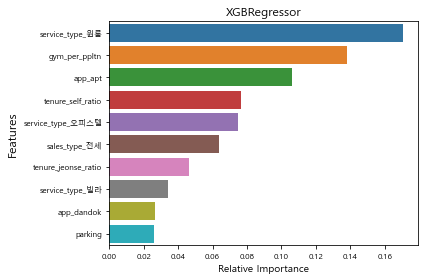

In [18]:
import xgboost
X, y =reg.get_xy(df)
X_train, X_test, y_train, y_test =reg.data_split(X, y)
xgb_best_param = xgboost.XGBRegressor(
        n_jobs=-1,
        n_estimators=2000,
        colsample_bytree=0.75,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.75,
        gamma=10,
        random_state=42,
    )
xgb_model =xgb_best_param.fit(X_train, y_train)
a = reg.feature_importance(xgb_model, X_train)

## 2-3. Tree model 결론
- `데이터 성능`: 
  - Original data > Poly data
  - 먼저 선형 모델에서 성능이 더 좋게 나왔던 다항변환 데이터로 Tree model을 돌려보았으나, 결과는 좋지 않음
  - 트리모델 자체가 변수 불연속성을 적용하기 때문에 다항변환이 불필요하다고 결론 내렸고, 이후 오리지널 데이터로만 Tree model 돌림
- `모델 성능`: 
  - XGBoost가 가장 좋음
  - XGBoost의 Train RMSE와 Test RMSE의 차이가 가장 적고, R2 socre 역시 높은 축에 속함
- `트리모델 한계`:  
  - 트리모델 중 베스트 모델이었던 XGB로 파라미터를 조정해봤지만 여전히 오차가 한자리 수(만원 대) 이내로 줄지 않음
- `결론`:
  - XGB가 개선되지 않았던 이유 추정: 
    - 주거형태가 특성중요도에서 높은 순위를 보임 (1, 5, 8위)
    - 수집한 데이터의 주거형태(원룸, 오피스텔, 빌라) 별로 특징이 상이하기 때문
    - 주거형태에 따라 가격에 영향을 미치는 요소가 다를 것이라 추측
  - XGB 모델 개선방향: 
    - 주거형태별(service_type)로 데이터를 나눠서 다시 트리모델 회귀분석 진행

---
# 3. 최종 모델 
- 최종 모델: 주거형태 별 XGB 회귀분석

## 3-1. 개선된 XGB model

In [2]:
df_oneroom  = df[(df['service_type']=='원룸')]
df_officetel = df[(df['service_type']=='오피스텔')]
df_villa= df[(df['service_type']=='빌라')]

     Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  XGBoost    1.138385   0.994157   7.143641  0.759003


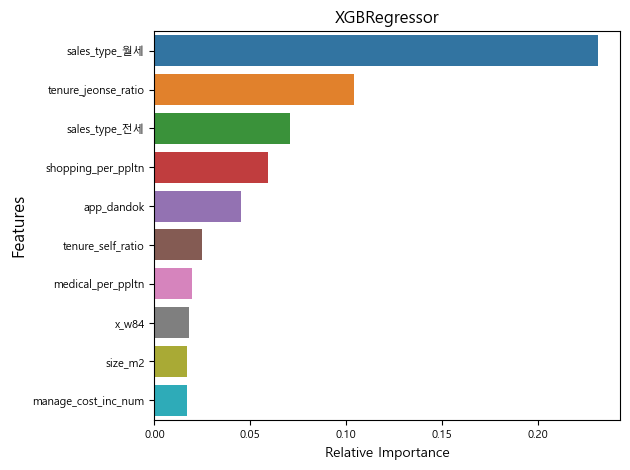

In [ ]:
df_oneroom_result = reg.get_model_each_servcie(df_oneroom, reg.get_bestparam_model())

오피스텔
     Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  XGBoost    1.356475   0.999366  17.366491  0.890989


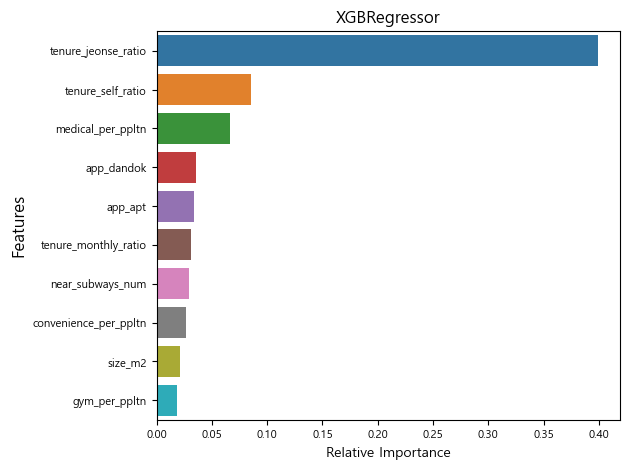

In [4]:
print('오피스텔')
df_officetel_result=reg.get_model_each_servcie(df_officetel, reg.get_bestparam_model)

빌라
     Model  Train RMSE  Train R^2  Test RMSE  Test R^2
0  XGBoost    1.129124   0.999487  22.739038   0.80217


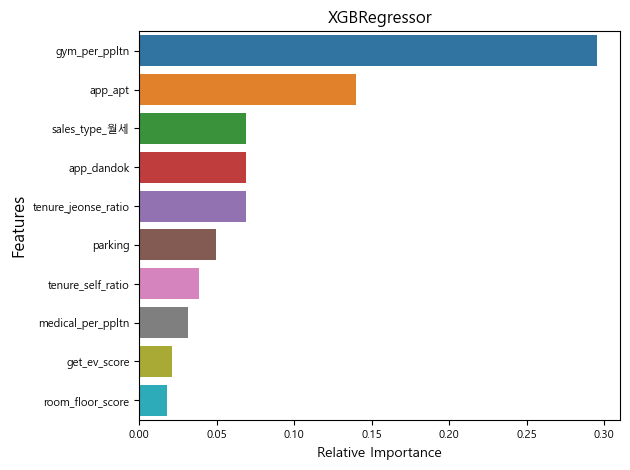

In [5]:
print('빌라')
df_villa_result = reg.get_model_each_servcie(df_villa, reg.get_bestparam_model)

## 3-2. 주거형태 별 회귀분석 결과해석
- 주거형태 중 원룸의 오차는 한자리 수로 개선됨. 
- 그러나 오피스텔, 빌라의 오차는 개선되지 않음. 
- 이는 원룸에 비해 오피스텔, 빌라의 데이터 샘플 수가 적었기 때문이라고 생각.
  - 원룸: 19,013개
  - 오피스텔: 8,259개
  - 빌라: 6,936개


In [6]:
# 주거형태(service_type) 별 데이터 수
df['service_type'].value_counts()

원룸      19013
오피스텔     8259
빌라       6936
Name: service_type, dtype: int64

---
# 4. 회귀분석 결론
목표했던 예측오차 1자리 대 달성(10만원 이내 오차, RMSE 기준)

- XGB 모델의 정확도가 떨어졌던 이유는 데이터의 양이 부족했기 때문
- 주거형태 별로 데이터가 충분했다면 개선 가능했을 것
